In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
test_preds = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/3_Threshold_Probability/End_Models/BERT_-_preds.csv')

In [3]:
y_true=test_preds.Y_test
y_pred=test_preds.Y_pred

## Plot confusion matrices - Test Set

### Overall

In [4]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pylab as pldata
import seaborn as sns
import matplotlib.pyplot as plt  

In [5]:
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

In [6]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.28      0.42       472
         1.0       0.36      0.88      0.51       220

    accuracy                           0.47       692
   macro avg       0.60      0.58      0.47       692
weighted avg       0.68      0.47      0.45       692



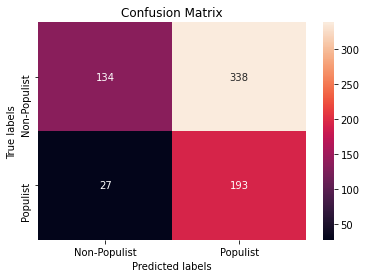

In [7]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Populist', 'Populist']); ax.yaxis.set_ticklabels(['Non-Populist', 'Populist']);
plt.savefig('images/cm_end_model_gbert_occ_all.svg')

In [8]:
len(test_preds.loc[test_preds['Y_test'] == 0])

472

### Per Text Category

In [9]:
test_preds.Category.unique()

array(['PressRelease', 'Past_PartyMan', 'PartyMan', 'SocialMedia'],
      dtype=object)

In [10]:
test_preds_PRESS = test_preds.loc[test_preds['Category'] == 'PressRelease']
test_preds_PAST_PARTYMAN = test_preds.loc[test_preds['Category'] == 'Past_PartyMan']
test_preds_PARTYMAN =  test_preds.loc[test_preds['Category'] == 'PartyMan']
test_preds_SOCIALMEDIA = test_preds.loc[test_preds['Category'] == 'SocialMedia']

In [16]:
def plot_cm(df, name):
    
    y_true = df.Y_test
    y_pred = df.Y_pred
    
    cm = confusion_matrix(y_true, y_pred)
    # Normalised
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    ax= plt.subplot()
    sns.heatmap(cmn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['Non-Populist', 'Populist']); ax.yaxis.set_ticklabels(['Non-Populist', 'Populist']);
    plt.savefig('images/cm_end_model_rf_cat_' + name + '.png')

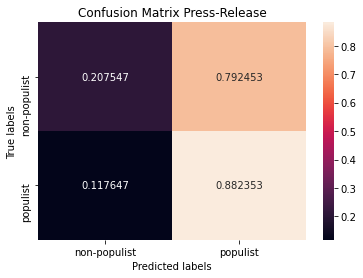

In [17]:
plot_cm(test_preds_PRESS, 'Press-Release')

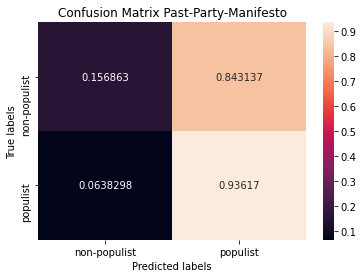

In [18]:
plot_cm(test_preds_PAST_PARTYMAN, 'Past-Party-Manifesto')

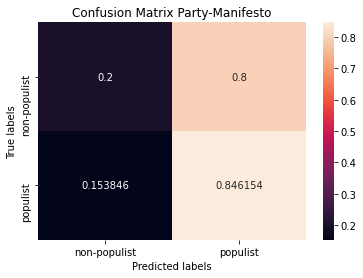

In [19]:
plot_cm(test_preds_PARTYMAN, 'Party-Manifesto')

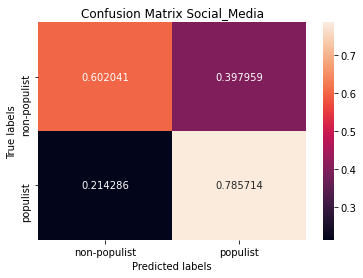

In [20]:
plot_cm(test_preds_SOCIALMEDIA, 'Social_Media')

## Per Populist Dimension

In [129]:
test_preds_pc = test_preds.loc[(test_preds.POPULIST_PeopleCent == 1) & (test_preds.POPULIST_AntiElite == 0) & (test_preds.POPULIST_Sovereign == 0)]
test_preds_ae = test_preds.loc[(test_preds.POPULIST_PeopleCent == 0) & (test_preds.POPULIST_AntiElite == 1) & (test_preds.POPULIST_Sovereign == 0)]
test_preds_sov = test_preds.loc[(test_preds.POPULIST_PeopleCent == 0) & (test_preds.POPULIST_AntiElite == 0) & (test_preds.POPULIST_Sovereign == 1)]

# test_preds_pc = test_preds.loc[(test_preds.POPULIST_PeopleCent == 1)]
# test_preds_ae = test_preds.loc[(test_preds.POPULIST_AntiElite == 1) ]
# test_preds_sov = test_preds.loc[(test_preds.POPULIST_Sovereign == 1)]

In [130]:
def plot_cm(df, name):
    
    y_true=df.Y_test
    y_pred=df.Y_pred
    
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalised
    cmn = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    print(classification_report(y_true,y_pred))
    
    
    ax= plt.subplot()
    sns.heatmap(cmn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    #ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
    plt.savefig('images/cm_end_model_' + name + '.png')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.83      0.91        78

    accuracy                           0.83        78
   macro avg       0.50      0.42      0.45        78
weighted avg       1.00      0.83      0.91        78



<ipython-input-130-bbb4fc345adb>:9: RuntimeWarning: invalid value encountered in true_divide
  cmn = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control

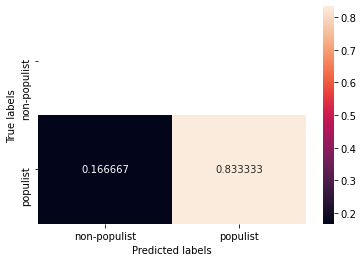

In [131]:
plot_cm(test_preds_pc, 'People-Cent')

<ipython-input-130-bbb4fc345adb>:9: RuntimeWarning: invalid value encountered in true_divide
  cmn = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dschw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.90      0.95       107

    accuracy                           0.90       107
   macro avg       0.50      0.45      0.47       107
weighted avg       1.00      0.90      0.95       107



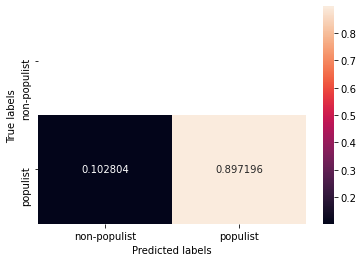

In [132]:
plot_cm(test_preds_ae, 'Anti-Elite')

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

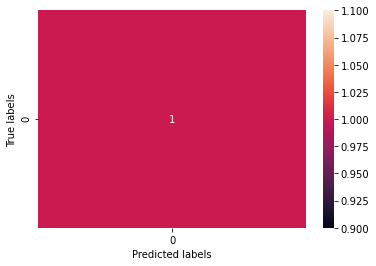

In [133]:
plot_cm(test_preds_sov, 'Sov')

In [134]:
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

## Plot Confusion Matrix BT Corpus

In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pylab as pldata
import seaborn as sns
import matplotlib.pyplot as plt  

In [12]:
test_preds_1 = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/BT/BERT_-_preds_1000.csv')
test_preds_10 = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/BT/BERT_-_preds_10000.csv')
test_preds_100 = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/BT/BERT_-_preds_100000.csv')
test_preds_200 = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Experiments/End_Model_Performances/BT/BERT_-_preds_200000.csv')

In [19]:
def plot_cm(df, name, xlabel):
    
    y_true=df.Y_test
    y_pred=df.Y_pred
    
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalised
    cmn = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    #print(classification_report(y_true,y_pred))
    
    
    ax= plt.subplot()
    sns.heatmap(cmn, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    if xlabel:
        ax.set_xlabel('Predicted labels');
        ax.xaxis.set_ticklabels(['Non-Populist', 'Populist']);
        
    else:
        ax.xaxis.set_ticklabels([]);
        ax.tick_params(bottom=False)
    ax.set_ylabel('True labels');
    ax.set_title('N = ' + name); 
    
    ax.yaxis.set_ticklabels(['Non-Populist', 'Populist']);
    plt.savefig('images/cm_gbert_bt_' + name + '.png')
    #plt.show()
    

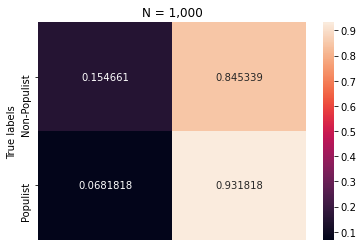

In [20]:
plot_cm(test_preds_1, '1,000', xlabel=False)

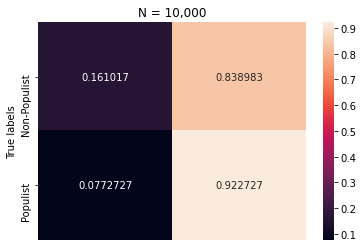

In [21]:
plot_cm(test_preds_10, '10,000', xlabel=False)

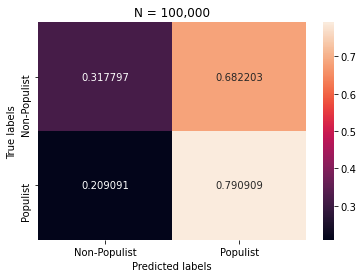

In [22]:
plot_cm(test_preds_100, '100,000', xlabel=True)

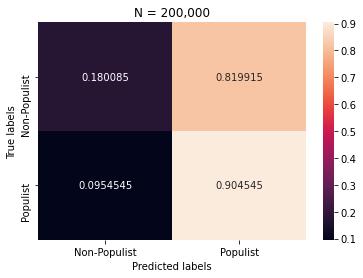

In [23]:
plot_cm(test_preds_200, '200,000', xlabel=True)